In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

import warnings
warnings.filterwarnings('ignore')

In [23]:
df_ = pd.read_csv('Capstone_Cleaning.csv')
df  = df_.copy()

In [82]:
df.km.head()

142    16500.00
767    15097.00
980         NaN
1937        NaN
1951        NaN
Name: km, dtype: float64

In [25]:
df.shape

(15919, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15919 non-null  int64  
 1   make_model           15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   price                15919 non-null  int64  
 4   vat                  11406 non-null  object 
 5   km                   14895 non-null  float64
 6   hp                   15831 non-null  float64
 7   type                 15917 non-null  object 
 8   gearing_type         15919 non-null  object 
 9   displacement         15423 non-null  float64
 10  fuel                 15919 non-null  object 
 11  co2_emission         13483 non-null  float64
 12  comfort&convenience  14999 non-null  object 
 13  entertainment&media  14545 non-null  object 
 14  extras               12957 non-null  object 
 15  safety&security      14937 non-null 

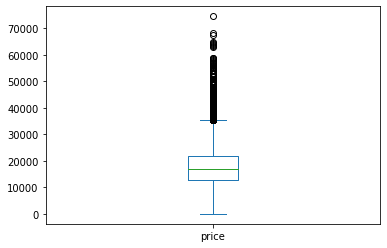

In [29]:
df['price'].plot(kind='box');

In [44]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(12850.0, 21900.0, 9050.0)

In [45]:
Q3 + 1.5*IQR

35475.0

In [46]:
Q1 - 1.5*IQR

-725.0

In [50]:
df=df[~((df['price']<(Q1 - 1.5*IQR)) | (df['price'] >(Q3 + 1.5*IQR)))]
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
0,0,Audi A1,Sedans,15770,VAT deductible,56013.00,66.00,Used,Automatic,1422.00,Benzine,99.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Catalytic Converter', 'Voice...","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,3.00,4.30,3.50,99.00,Cloth
1,1,Audi A1,Sedans,14500,Price negotiable,80000.00,141.00,Used,Automatic,1798.00,other_fuel,129.00,"Air conditioning,Automatic climate control,Hil...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats', 'Sport suspens...","['ABS', 'Central door lock', 'Central door loc...",7.00,2.00,No,NaN,5.00,7.10,4.70,129.00,Cloth
2,2,Audi A1,Sedans,14640,VAT deductible,83450.00,85.00,Used,Automatic,1598.00,Benzine,99.00,"Air conditioning,Cruise control,Electrical sid...","['MP3', 'On-board computer']","['Alloy wheels', 'Voice Control']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,3.00,4.40,3.40,99.00,Cloth
3,3,Audi A1,Sedans,14500,NaN,73000.00,66.00,Used,Automatic,1422.00,Benzine,99.00,"Air suspension,Armrest,Auxiliary heating,Elect...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport seats', 'Voice Control']","['ABS', 'Alarm system', 'Central door lock wit...",6.00,3.00,No,NaN,3.00,4.30,3.50,99.00,NaN
4,4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,109.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,NaN,4.00,4.60,3.80,109.00,Cloth


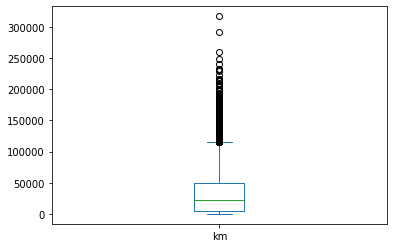

In [34]:
df['km'].plot(kind='box');

In [35]:
Q1 = df.km.quantile(0.25)
Q3 = df.km.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(5153.0, 49371.5, 44218.5)

In [37]:
Q1 - 1.5*IQR


-61174.75

In [38]:
Q3 + 1.5*IQR

115699.25

In [52]:
df=df[~((df['km']<(Q1 - 1.5*IQR)) | (df['km'] >(Q3 + 1.5*IQR)))]
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
4,4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,109.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,NaN,4.00,4.60,3.80,109.00,Cloth
7,7,Audi A1,Compact,14480,VAT deductible,14986.00,66.00,Used,Automatic,1422.00,Benzine,97.00,"Air conditioning,Armrest,Electrical side mirro...","['CD player', 'MP3', 'Radio']",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...",7.00,3.00,No,NaN,3.00,4.20,3.40,97.00,Cloth
9,9,Audi A1,Sedans,17990,NaN,16103.00,70.00,Used,Automatic,999.00,other_fuel,NaN,NaN,NaN,NaN,NaN,7.00,2.00,No,3.00,NaN,NaN,NaN,NaN,NaN
10,10,Audi A1,Sedans,18500,VAT deductible,11300.00,85.00,Used,Automatic,1598.00,Benzine,105.00,"Air conditioning,Multi-function steering wheel...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Shift paddles']","['ABS', 'Central door lock', 'Daytime running ...",7.00,1.00,No,NaN,NaN,4.60,3.60,105.00,Cloth
11,11,Audi A1,Sedans,17990,NaN,26415.00,92.00,Used,Automatic,1395.00,other_fuel,112.00,"Air conditioning,Automatic climate control,Ele...","['CD player', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,4.00,6.20,4.20,112.00,Cloth


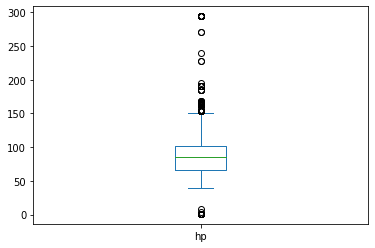

In [40]:
df['hp'].plot(kind='box');

In [53]:
Q1 = df.hp.quantile(0.25)
Q3 = df.hp.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(150.0, 23000.0, 22850.0)

In [56]:
df=df[~((df['hp']<(Q1 - 1.5*IQR)) | (df['hp'] >(Q3 + 1.5*IQR)))]
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
4,4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,109.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,NaN,4.00,4.60,3.80,109.00,Cloth
7,7,Audi A1,Compact,14480,VAT deductible,14986.00,66.00,Used,Automatic,1422.00,Benzine,97.00,"Air conditioning,Armrest,Electrical side mirro...","['CD player', 'MP3', 'Radio']",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...",7.00,3.00,No,NaN,3.00,4.20,3.40,97.00,Cloth
9,9,Audi A1,Sedans,17990,NaN,16103.00,70.00,Used,Automatic,999.00,other_fuel,NaN,NaN,NaN,NaN,NaN,7.00,2.00,No,3.00,NaN,NaN,NaN,NaN,NaN
10,10,Audi A1,Sedans,18500,VAT deductible,11300.00,85.00,Used,Automatic,1598.00,Benzine,105.00,"Air conditioning,Multi-function steering wheel...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Shift paddles']","['ABS', 'Central door lock', 'Daytime running ...",7.00,1.00,No,NaN,NaN,4.60,3.60,105.00,Cloth
11,11,Audi A1,Sedans,17990,NaN,26415.00,92.00,Used,Automatic,1395.00,other_fuel,112.00,"Air conditioning,Automatic climate control,Ele...","['CD player', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,4.00,6.20,4.20,112.00,Cloth


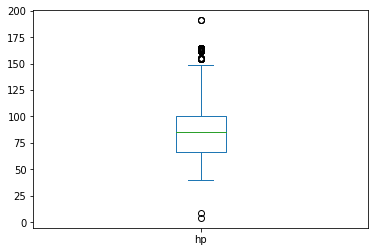

In [57]:
df['hp'].plot(kind='box');

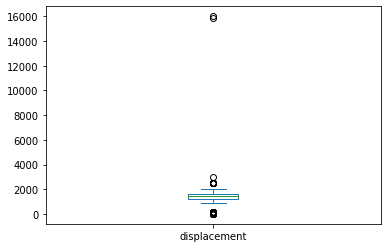

In [41]:
df['displacement'].plot(kind='box');

In [58]:
Q1 = df.displacement.quantile(0.25)
Q3 = df.displacement.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(999.0, 1598.0, 599.0)

In [59]:
df=df[~((df['displacement']<(Q1 - 1.5*IQR)) | (df['displacement'] >(Q3 + 1.5*IQR)))]
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
4,4,Audi A1,Sedans,16790,NaN,16200.00,66.00,Used,Automatic,1422.00,Benzine,109.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Sport package', 'Sport suspe...","['ABS', 'Central door lock', 'Driver-side airb...",NaN,3.00,No,NaN,4.00,4.60,3.80,109.00,Cloth
7,7,Audi A1,Compact,14480,VAT deductible,14986.00,66.00,Used,Automatic,1422.00,Benzine,97.00,"Air conditioning,Armrest,Electrical side mirro...","['CD player', 'MP3', 'Radio']",['Alloy wheels'],"['ABS', 'Central door lock', 'Daytime running ...",7.00,3.00,No,NaN,3.00,4.20,3.40,97.00,Cloth
9,9,Audi A1,Sedans,17990,NaN,16103.00,70.00,Used,Automatic,999.00,other_fuel,NaN,NaN,NaN,NaN,NaN,7.00,2.00,No,3.00,NaN,NaN,NaN,NaN,NaN
10,10,Audi A1,Sedans,18500,VAT deductible,11300.00,85.00,Used,Automatic,1598.00,Benzine,105.00,"Air conditioning,Multi-function steering wheel...","['Bluetooth', 'CD player', 'Hands-free equipme...","['Alloy wheels', 'Shift paddles']","['ABS', 'Central door lock', 'Daytime running ...",7.00,1.00,No,NaN,NaN,4.60,3.60,105.00,Cloth
11,11,Audi A1,Sedans,17990,NaN,26415.00,92.00,Used,Automatic,1395.00,other_fuel,112.00,"Air conditioning,Automatic climate control,Ele...","['CD player', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Sport seats']","['ABS', 'Central door lock', 'Daytime running ...",NaN,3.00,No,NaN,4.00,6.20,4.20,112.00,Cloth


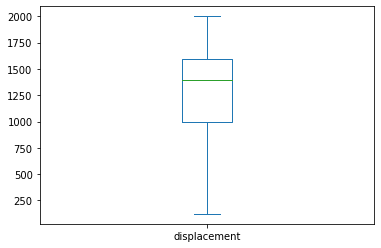

In [60]:
df['displacement'].plot(kind='box');

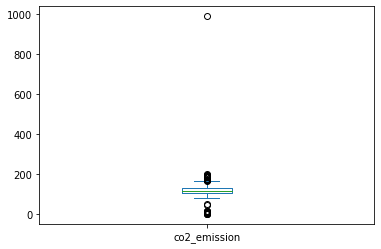

In [62]:
df['co2_emission'].plot(kind='box');

In [61]:
Q1 = df.co2_emission.quantile(0.25)
Q3 = df.co2_emission.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(106.0, 130.0, 24.0)

In [63]:
df=df[~((df['displacement']<(Q1 - 1.5*IQR)) | (df['displacement'] >(Q3 + 1.5*IQR)))]
df.head()

,Unnamed: 0,make_model,body_type,price,vat,km,hp,type,gearing_type,displacement,fuel,co2_emission,comfort&convenience,entertainment&media,extras,safety&security,gears,age_of_car,Inspection,warranty_,cons_comb,cons_city,cons_country,co2_emission6,Upholstery_Type
142,142,Audi A1,Sedans,18200,VAT deductible,16500.00,85.00,Used,Automatic,NaN,Benzine,NaN,"Air conditioning,Air suspension,Armrest,Automa...","['Bluetooth', 'CD player', 'Digital radio', 'H...","['Alloy wheels', 'Catalytic Converter', 'Shift...","['ABS', 'Adaptive Cruise Control', 'Adaptive h...",6.00,1.00,No,NaN,NaN,NaN,NaN,NaN,Cloth
191,191,Audi A1,Compact,17900,NaN,11300.00,66.00,Used,Automatic,NaN,Benzine,NaN,NaN,NaN,NaN,NaN,7.00,3.00,No,12.00,NaN,NaN,NaN,NaN,NaN
404,404,Audi A1,Sedans,15500,NaN,24000.00,66.00,Used,Automatic,NaN,Benzine,NaN,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'MP3', 'On-board computer', 'Rad...","['Sport package', 'Sport seats', 'Sport suspen...","['ABS', 'Adaptive Cruise Control', 'Adaptive h...",7.00,3.00,No,NaN,NaN,NaN,NaN,NaN,Cloth
412,412,Audi A1,Sedans,15450,NaN,34011.00,85.00,Used,Automatic,NaN,Benzine,97.00,"Air conditioning,Armrest,Automatic climate con...","['Bluetooth', 'Hands-free equipment', 'On-boar...","['Alloy wheels', 'Shift paddles']",['Isofix'],7.00,3.00,No,NaN,NaN,4.00,NaN,97.00,Cloth
744,744,Audi A1,Other,23490,NaN,22001.00,140.00,Used,Automatic,NaN,other_fuel,134.00,"Air conditioning,Automatic climate control,Cru...","['CD player', 'On-board computer']","['Roof rack', 'Sport seats']","['Adaptive Cruise Control', 'Central door lock...",7.00,2.00,No,3.00,5.00,7.40,4.90,134.00,NaN


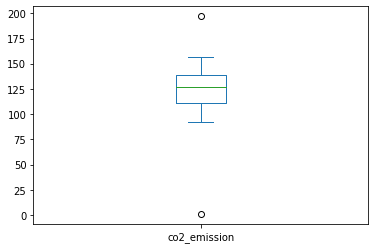

In [64]:
df['co2_emission'].plot(kind='box');

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 142 to 15795
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           269 non-null    int64  
 1   make_model           269 non-null    object 
 2   body_type            264 non-null    object 
 3   price                269 non-null    int64  
 4   vat                  119 non-null    object 
 5   km                   231 non-null    float64
 6   hp                   229 non-null    float64
 7   type                 269 non-null    object 
 8   gearing_type         269 non-null    object 
 9   displacement         12 non-null     float64
 10  fuel                 269 non-null    object 
 11  co2_emission         75 non-null     float64
 12  comfort&convenience  179 non-null    object 
 13  entertainment&media  153 non-null    object 
 14  extras               141 non-null    object 
 15  safety&security      176 non-null   

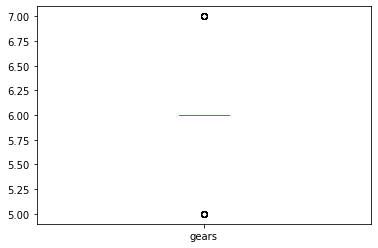

In [67]:
df['gears'].plot(kind='box');

In [68]:
Q1 = df.gears.quantile(0.25)
Q3 = df.gears.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(6.0, 6.0, 0.0)

In [69]:
df=df[~((df['gears']<(Q1 - 1.5*IQR)) | (df['gears'] >(Q3 + 1.5*IQR)))]
df.gears.head()

142   6.00
767    NaN
810    NaN
908    NaN
980   6.00
Name: gears, dtype: float64

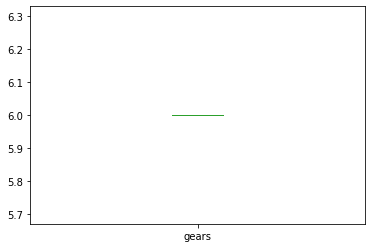

In [70]:
df['gears'].plot(kind='box');

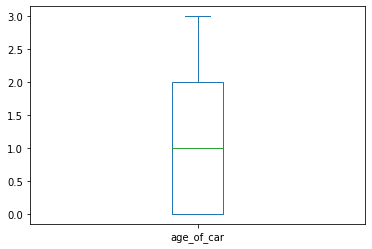

In [71]:
df['age_of_car'].plot(kind='box');

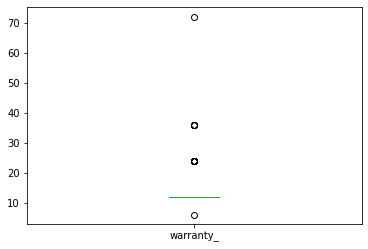

In [72]:
df['warranty_'].plot(kind='box');

In [73]:
Q1 = df.warranty_.quantile(0.25)
Q3 = df.warranty_.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(12.0, 12.0, 0.0)

In [74]:
df=df[~((df['warranty_']<(Q1 - 1.5*IQR)) | (df['warranty_'] >(Q3 + 1.5*IQR)))]
df.warranty_.head()

142    NaN
767    NaN
980    NaN
1937   NaN
1951   NaN
Name: warranty_, dtype: float64

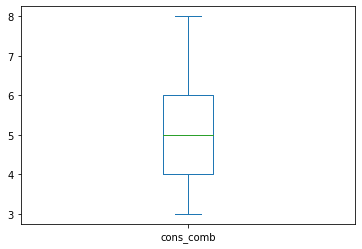

In [75]:
df['cons_comb'].plot(kind='box');

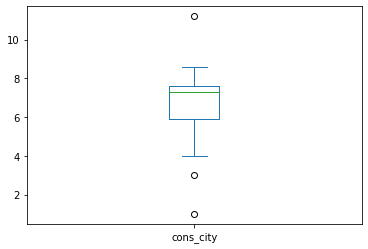

In [76]:
df['cons_city'].plot(kind='box');

In [77]:
Q1 = df.cons_city.quantile(0.25)
Q3 = df.cons_city.quantile(0.75)
IQR = Q3 - Q1
Q1, Q3,IQR

(5.9, 7.6, 1.6999999999999993)

In [78]:
df=df[~((df['cons_city']<(Q1 - 1.5*IQR)) | (df['cons_city'] >(Q3 + 1.5*IQR)))]
df.cons_city.head()

142     NaN
767     NaN
980     NaN
1937   5.90
1951   5.90
Name: cons_city, dtype: float64

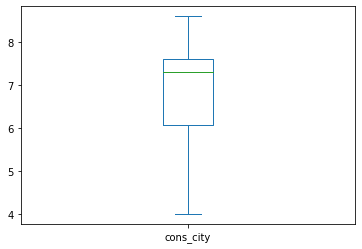

In [79]:
df['cons_city'].plot(kind='box');

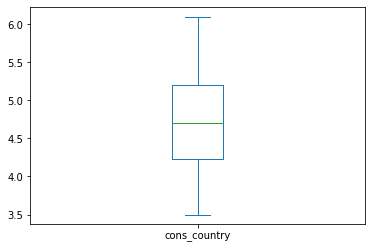

In [80]:
df['cons_country'].plot(kind='box');

In [81]:
df.to_csv('Capstone_Outliers.csv')